### Part 2:
### Start Analyzing data

In [60]:
import pandas as pd

In [61]:
df = pd.read_csv(r'C:\Users\rajath.k\Downloads\marketing_data.csv')

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

In [63]:
## pre-processing from prev part
df.columns = df.columns.str.strip()
df['Income'] = df['Income'].str.replace("$", '', regex=False).str.replace(",", '', regex=False)
df['Income'] = df['Income'].astype("float")

df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

In [64]:
## imputing/filling mean value for Income column

df['Income'] = df['Income'].fillna(df['Income'].median())
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2240 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

## Univariate
### 1. Num: non-viz & viz <br> 2. Cat: non-viz & viz

## Bivariate
### 1. Num vs Num: non-viz & viz <br> 2. Cat vs Num: non-viz & viz <br> 3. Cat vs Cat: non-viz & viz

### Analyzing Income Feature

In [65]:
df['Income'].mean() ## average household income in $

52237.97544642857

In [66]:
df['Income'].median() ## median household income in $

51381.5

In [67]:
df['Income'].min() ## min income

1730.0

In [68]:
df['Income'].max() ## max income

666666.0

### Generalized way to aggregate for all columns

In [69]:
# def numerical_univariate_analysis(numerical_data):
#     for col_name in numerical_data:
#         print("*"*10, col_name, "*"*10)
#         print(numerical_data[col_name].agg(['min', 'max', 'mean', 'median', 'std']))
#         print()

# numerical_univariate_analysis(df)

In [70]:
df['Income'].quantile(0.75) ## 75th percentile income

68289.75

In [71]:
df['Income'].std() ## spread of the income wrt mean

25037.9558906219

In [72]:
df['Income'].skew()
## if skew > 0 -> right skewed, how symmteric is the data? 
## + when tails extend more in right, - when left, 0 if symmetric

6.800947406327349

In [73]:
## kurtosis of income says how different is our data different from normal distribution
## if kurtosis = 3, it is exactly normal distn
df['Income'].kurt()

161.4001441823563

<Axes: ylabel='Density'>

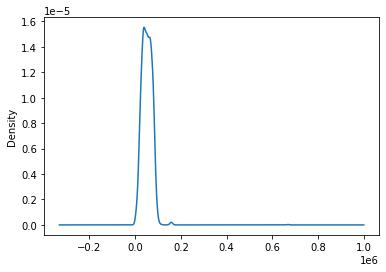

In [74]:
df['Income'].plot(kind='kde')

<Axes: >

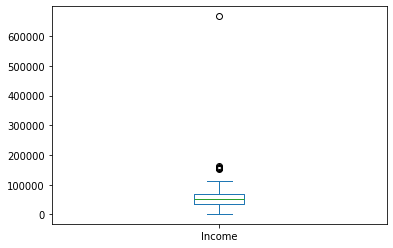

In [75]:
df['Income'].plot(kind='box')

In [76]:
## QQ Plot
## It is visual way to say, how diffrent the data is from normal distn
### if it is a 45 degree line, it follows normal distn

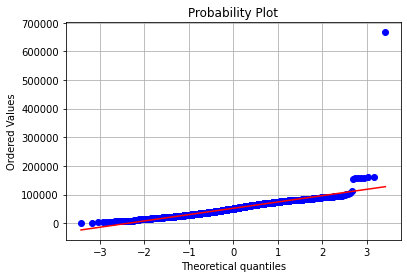

In [77]:
from scipy import stats
import matplotlib.pyplot as plt

stats.probplot(df['Income'], dist='norm', plot=plt)
plt.grid()

<Axes: >

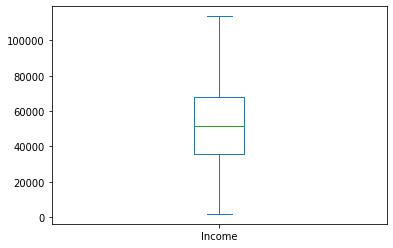

In [78]:
## data has ouliers, we need to remove it to get clear picture of data
cl_df = df[df['Income']<=150000]
cl_df['Income'].plot(kind='box')

<Axes: xlabel='Marital_Status', ylabel='Income'>

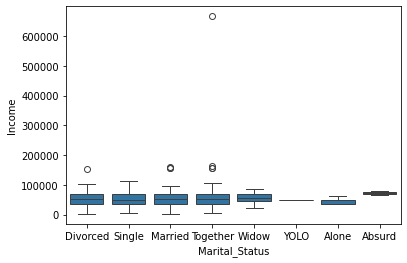

In [79]:
## finding relation between marital_status and income level
## Cat vs num data - box or boxen plot

import seaborn as sb

sb.boxplot(data=df, x="Marital_Status", y="Income")

<Axes: xlabel='Marital_Status', ylabel='Income'>

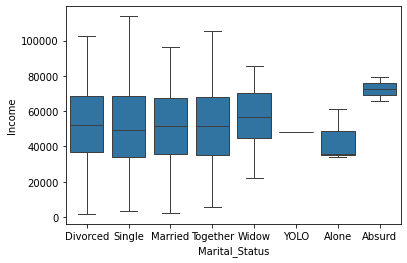

In [80]:
## remove outliers
sb.boxplot(data=cl_df, x="Marital_Status", y="Income")

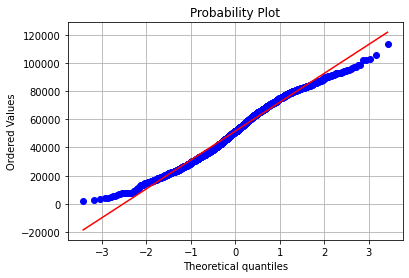

In [81]:
stats.probplot(cl_df['Income'], dist='norm', plot=plt)
plt.grid()

<Axes: ylabel='Density'>

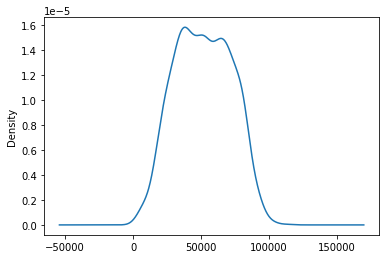

In [82]:
cl_df['Income'].plot(kind='kde')

## IQR Method to Remove outliers

<Axes: >

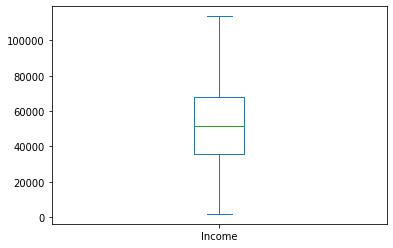

In [83]:
q1 = df['Income'].quantile(0.25)
q3 = df['Income'].quantile(0.75)

iqr = q3 - q1

lower_bound = q1 - 1.5*iqr
upper_bound = q3 + 1.5*iqr

clean_df = df[(df['Income'] >= lower_bound) & (df['Income'] <= upper_bound)]
clean_df['Income'].plot(kind='box')

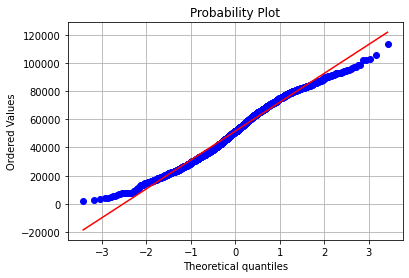

In [84]:
stats.probplot(clean_df['Income'], dist='norm', plot=plt)
plt.grid()

## Analyzing How much people spend on Wines

In [85]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country'],
      dtype='object')

In [86]:
def numerical_univariate_analysis(numerical_data):
    for col_name in numerical_data:
        print("*"*10, col_name, "*"*10)
        print(numerical_data[col_name].agg(['min', 'max', 'mean', 'median', 'std', 'skew', 'kurt']))
        print()

In [87]:
numerical_univariate_analysis(df[['MntWines']])

********** MntWines **********
min          0.000000
max       1493.000000
mean       303.935714
median     173.500000
std        336.597393
skew         1.175771
kurt         0.598744
Name: MntWines, dtype: float64



<Axes: ylabel='Density'>

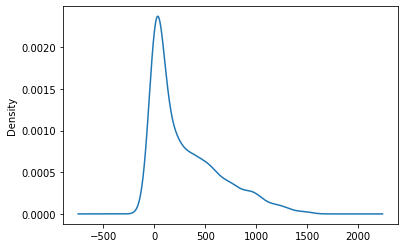

In [88]:
df['MntWines'].plot(kind='kde')

<Axes: >

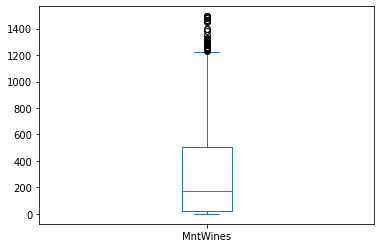

In [89]:
## check outliers

df['MntWines'].plot(kind='box')

### Analyzing Marital_Status Feature

In [90]:
## Always, check cardinality of categorical column
df['Marital_Status'].nunique()

8

In [91]:
df['Marital_Status'].value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
YOLO          2
Absurd        2
Name: Marital_Status, dtype: int64

In [92]:
df['Marital_Status'].value_counts(normalize=True)

Married     0.385714
Together    0.258929
Single      0.214286
Divorced    0.103571
Widow       0.034375
Alone       0.001339
YOLO        0.000893
Absurd      0.000893
Name: Marital_Status, dtype: float64

<Axes: >

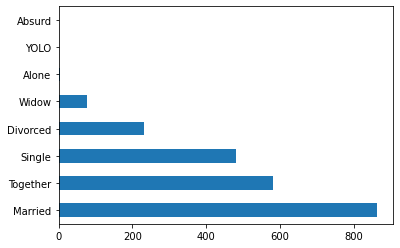

In [93]:
df['Marital_Status'].value_counts().plot(kind='barh')

In [94]:
def discrete_univariate_analysis(discrete_data):
    for col_name in discrete_data:
        print("*"*10, col_name, "*"*10)
        print(discrete_data[col_name].agg(['count', 'nunique', 'unique']))
        print('Value counts: \n', discrete_data[col_name].value_counts(normalize=True))
        print()

In [95]:
discrete_univariate_analysis(df[['Marital_Status']])

********** Marital_Status **********
count                                                   2240
nunique                                                    8
unique     [Divorced, Single, Married, Together, Widow, Y...
Name: Marital_Status, dtype: object
Value counts: 
 Married     0.385714
Together    0.258929
Single      0.214286
Divorced    0.103571
Widow       0.034375
Alone       0.001339
YOLO        0.000893
Absurd      0.000893
Name: Marital_Status, dtype: float64



In [96]:
discrete_univariate_analysis(df[['Education']])

********** Education **********
count                                            2240
nunique                                             5
unique     [Graduation, PhD, 2n Cycle, Master, Basic]
Name: Education, dtype: object
Value counts: 
 Graduation    0.503125
PhD           0.216964
Master        0.165179
2n Cycle      0.090625
Basic         0.024107
Name: Education, dtype: float64



### All Numerical Features at once

In [97]:
numerical_features = list(df.select_dtypes(include=['number']).columns)
categorical_features = list(df.select_dtypes(include=['object']).columns)

numerical_features.remove('ID')

num_discrete_features = ['Year_Birth', 'Kidhome', 'Teenhome',
                        'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
                        'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
                        'Response', 'Complain']

numerical_features = [feature for feature in numerical_features if feature not in num_discrete_features]

array([[<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>],
       [<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>],
       [<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>],
       [<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>]],
      dtype=object)

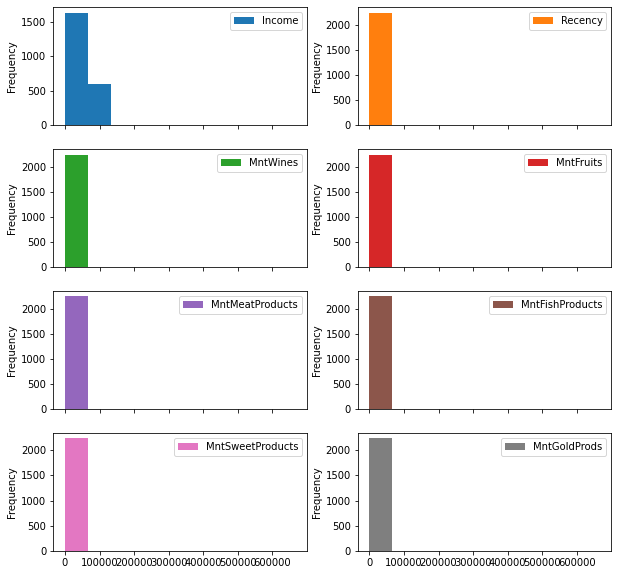

In [98]:
df[numerical_features].plot(kind='hist', subplots=True, layout=(4,2), figsize=(10,10))

Income                  Axes(0.125,0.71587;0.352273x0.16413)
Recency              Axes(0.547727,0.71587;0.352273x0.16413)
MntWines               Axes(0.125,0.518913;0.352273x0.16413)
MntFruits           Axes(0.547727,0.518913;0.352273x0.16413)
MntMeatProducts        Axes(0.125,0.321957;0.352273x0.16413)
MntFishProducts     Axes(0.547727,0.321957;0.352273x0.16413)
MntSweetProducts          Axes(0.125,0.125;0.352273x0.16413)
MntGoldProds           Axes(0.547727,0.125;0.352273x0.16413)
dtype: object

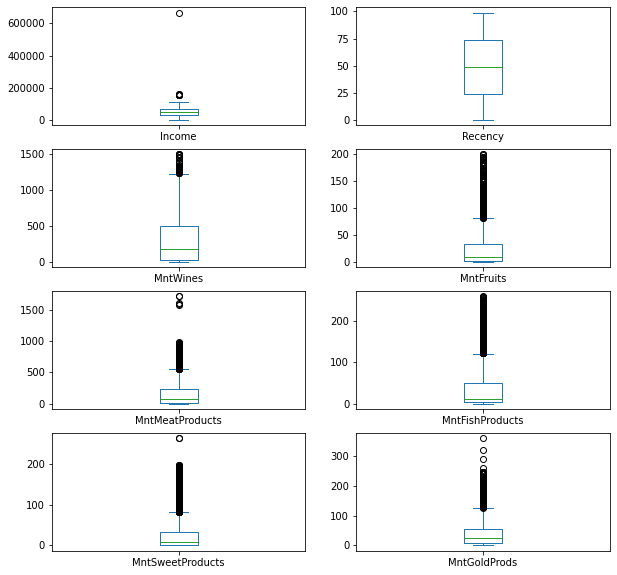

In [99]:
df[numerical_features].plot(kind='box', subplots=True, layout=(4,2), figsize=(10,10))

## Bivariate analysis

### - Income Vs MntWines

C:\Users\rajath.k\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\plotting\_matplotlib\core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: xlabel='Income', ylabel='MntWines'>

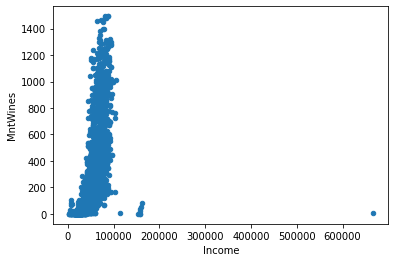

In [100]:
df.plot(kind='scatter', x='Income', y='MntWines')

<Axes: xlabel='Income', ylabel='MntWines'>

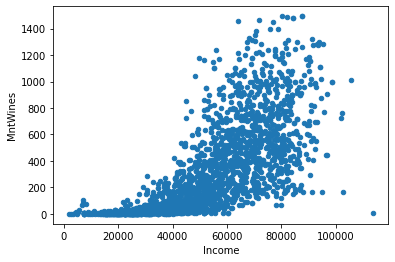

In [101]:
## performing bivariate in outlier cleaned data

clean_df.plot(kind='scatter', x='Income', y='MntWines')

### - Relation b/w Marital_status Vs Education
- Discrete vs Discrete

<Axes: xlabel='Education'>

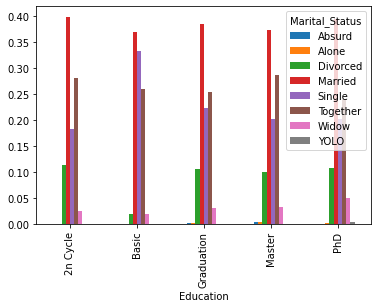

In [102]:
tab = pd.crosstab(df['Education'], df['Marital_Status'], normalize='index')

tab.plot(kind='bar')

### How much is spent on wines based on Education level

<Axes: title={'center': 'MntWines'}, xlabel='Education'>

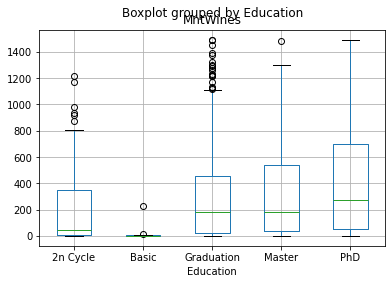

In [103]:
df.boxplot(by='Education', column='MntWines')

### How much is spent on wines based on marital status

<Axes: title={'center': 'MntWines'}, xlabel='Marital_Status'>

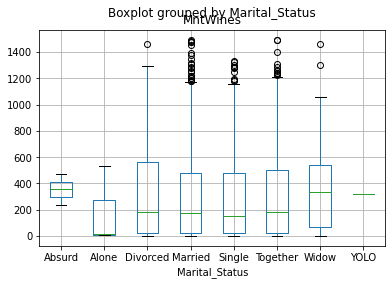

In [104]:
df.boxplot(by='Marital_Status', column='MntWines')